## Analysis The Data

Firstly, we included some package we will use in our project and read our dataset.



In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [3]:
insurance = pd.read_csv("insurance.csv")
ins = insurance.copy()
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Quick Look at the dataset

We use "ins.isna().sum()" to check if there is a null value.

The "sum()" function will display if there is a null value.

In [44]:
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


 _We can see we have 1338 entries and 10 attributes._

---

*  Also We have no null data.

* While attributes of smoker, region and sex are category type, others are numerical.



In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Distribution of BMI

* BMI looks like has a normal distribution .


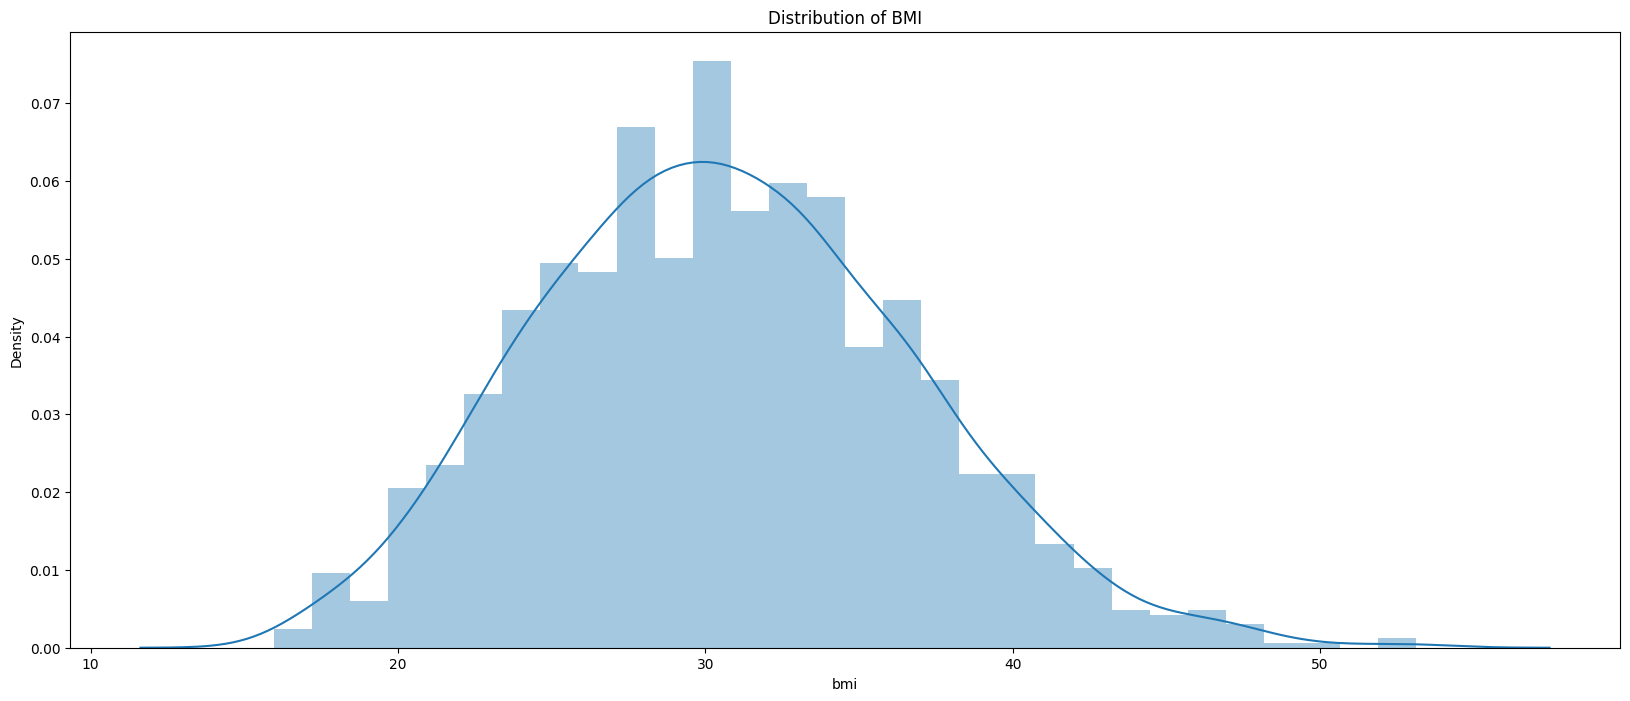

In [ ]:
plt.figure(figsize=(20, 8))
sns.distplot(ins.bmi, bins=30)
plt.title('Distribution of BMI')
plt.show()

# Relationship between "smoker" and "region"

* There is no relationship between smoking and region.

<Axes: xlabel='region', ylabel='count'>

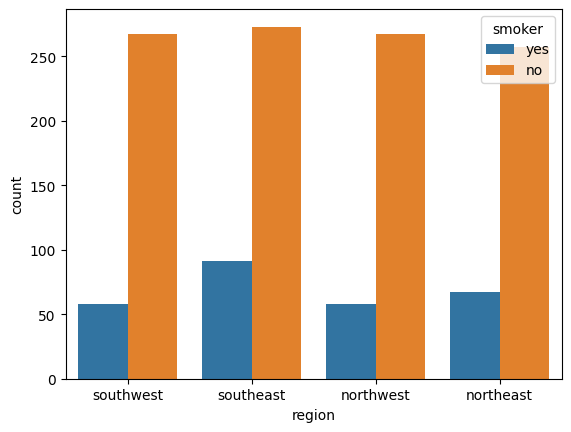

In [ ]:
sns.countplot(data=ins, x='region', hue='smoker')


# Relationship between Smoker and Charges

* Smokers have higher costs so there is a linear relationship between them.

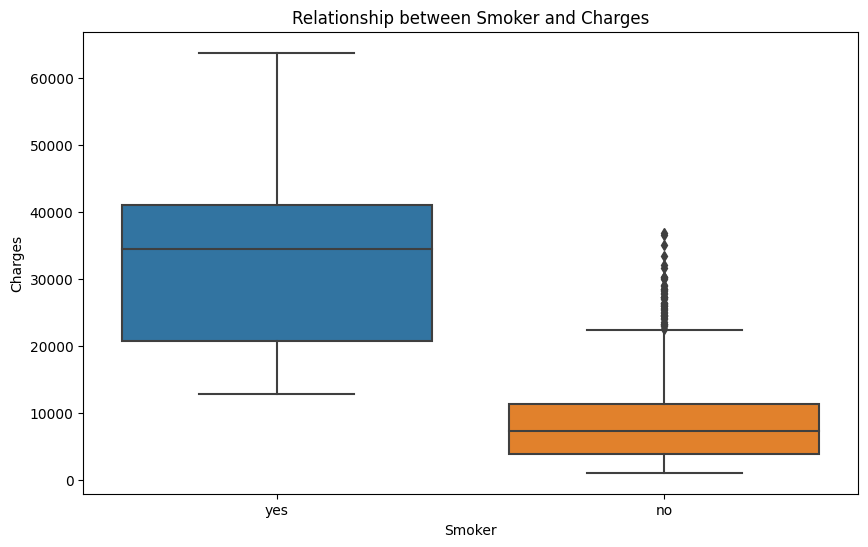

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=ins)
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# BMI Distribution based on Sex

* There is no relationship between BMI and sex

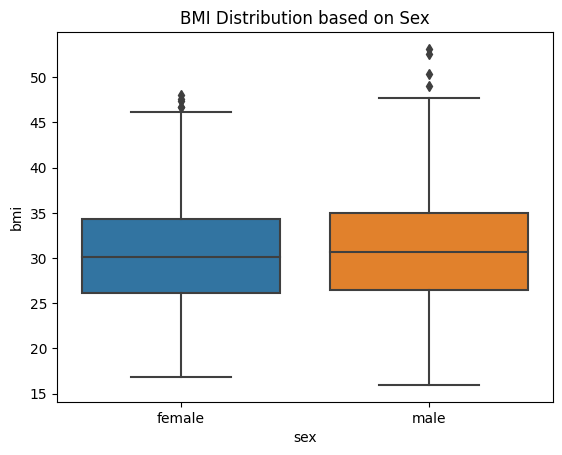

In [ ]:
sns.boxplot(x='sex', y='bmi', data=ins)
plt.title('BMI Distribution based on Sex')
plt.show()

# The "region" with the most "children"

* The region which has the most children is "Southeast" with a total of 382 children.

In [ ]:
children_by_region = ins.groupby("region")["children"].sum()

most_children_region = children_by_region.idxmax()
most_children_count = children_by_region.max()

print(f"The region with the most children is '{most_children_region}' with a total of {most_children_count} children.")

The region with the most children is 'southeast' with a total of 382 children.


# Relationship between Age and BMI

* We can say that there is no relationship between age and BMI


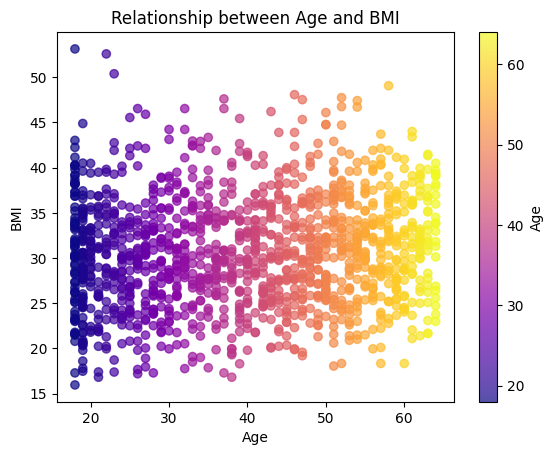

In [5]:
# Create a scatter plot with color mapping based on a gradient
plt.scatter(ins["age"], ins["bmi"], c=ins["age"], cmap="plasma", alpha=0.7)

# Add a colorbar to indicate the age range
cbar = plt.colorbar()
cbar.set_label("Age")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Relationship between Age and BMI")

# Show the plot
plt.show()

#relationship between age and BMI

* We cannot say that there is a linear relationship between age and BMI

Text(0.5, 1.0, 'relationship between age and BMI')

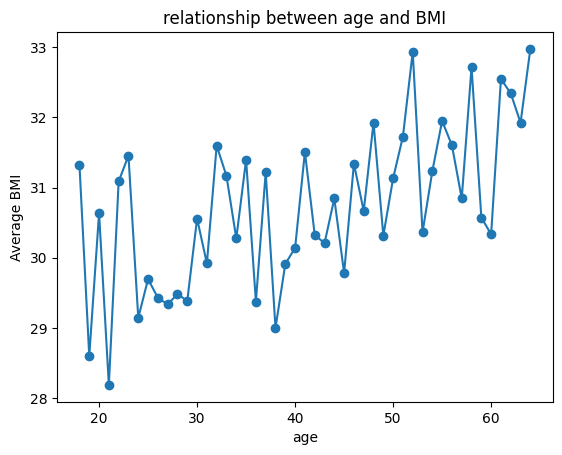

In [8]:
age_bmi=ins.groupby("age")["bmi"].mean()
plt.plot(age_bmi.index,age_bmi.values,marker="o")
plt.xlabel("age")
plt.ylabel("Average BMI")
plt.title("relationship between age and BMI")

# BMI variable has outliers

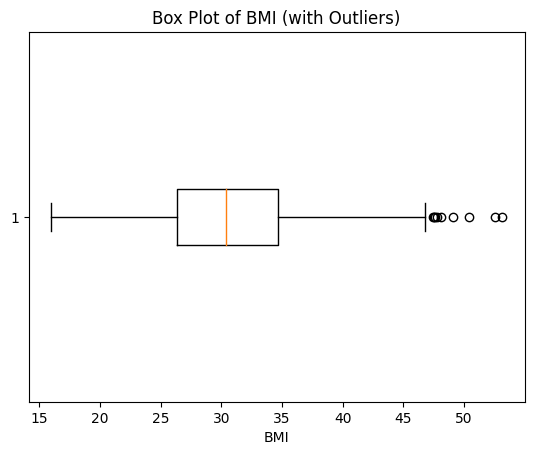

In [ ]:
# Create a box plot to visualize outliers in "bmi"
plt.boxplot(ins["bmi"], vert=False)

# Add labels and title
plt.xlabel("BMI")
plt.title("Box Plot of BMI (with Outliers)")

# Show the plot
plt.show()



# Relationship between BMI and Charges

* There is a linear relationship between BMI and Charges.

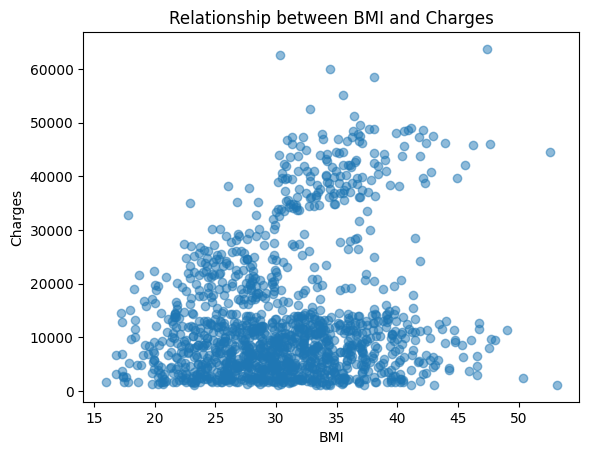

In [ ]:
plt.scatter(ins["bmi"], ins["charges"], alpha=0.5)  # alpha controls transparency

# Add labels and title
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Relationship between BMI and Charges")

# Show the plot
plt.show()

# Relationship between Region, Smoker, and BMI

* There is no relationship between Region,Smoker and BMI

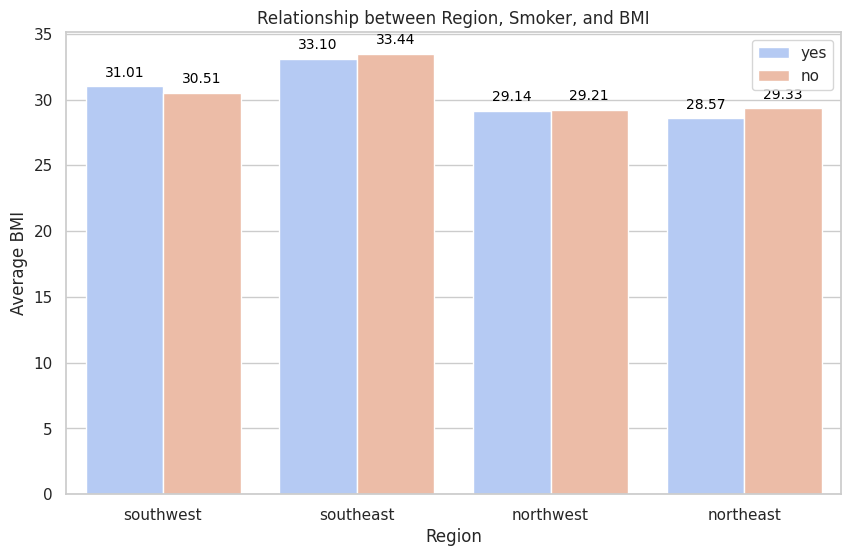

In [ ]:

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=ins, x="region", y="bmi", hue="smoker", ci=None, palette="coolwarm")

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Average BMI")
plt.title("Relationship between Region, Smoker, and BMI")

# Customize legend location
plt.legend(loc="upper right")

# Display numeric values on top of columns
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.show()

In [17]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(ins['bmi'])

# Keep only data within 3 standard deviations
df = ins[(z_scores < 3) & (z_scores > -3)]

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
ins.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# One-Hot Encoding

In [22]:
# Perform One-Hot Encoding
ins_encoded = pd.get_dummies(ins, columns=['sex', 'smoker', 'region'], drop_first=True)


In [23]:
# Define features (X) and target variable (y)
X = ins_encoded.drop('charges', axis=1)
y = ins_encoded['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the split datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1070, 8)
X_test shape: (268, 8)
y_train shape: (1070,)
y_test shape: (268,)


In [30]:
# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

**Based on these results, it seems that Random Forest (RF) and Gradient Boosting (GBM) are performing comparatively well with lower MSE values.**

In [39]:

# Create a list of tuples with model names and instances
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))]

# Loop through the models
for name, model in models:
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print()

Model: LR
Mean Squared Error: 33596915.851361476

Model: Ridge
Mean Squared Error: 33646289.45224457

Model: Lasso
Mean Squared Error: 33606145.680377945

Model: ElasticNet
Mean Squared Error: 99066704.13679849

Model: KNN
Mean Squared Error: 33618769.924612425

Model: CART
Mean Squared Error: 39320394.13971824

Model: RF
Mean Squared Error: 20680692.39717156

Model: SVR
Mean Squared Error: 166252103.37189862

Model: GBM
Mean Squared Error: 18740069.848530754

Model: XGBoost
Mean Squared Error: 25935395.134670373



# Optimize parameters with Grid Search.

In [40]:

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE Score: 22471677.378539972


# Overall, The model seems to be performing quite well with an R-squared of 0.877 and relatively low errors in terms of MSE, MAE, and RMSE.

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using the optimized model
y_pred = grid_search.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 19035341.116234757
Mean Absolute Error: 2481.095892511284
Root Mean Squared Error: 4362.950964225332
R-squared: 0.8773881053112281
